In [22]:
## This codes are used to quickly check the absorption peak when having the data with the beam moved away
## from the sample as the references

import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import sys
import statsmodels.api as sm

##**************Important: Check the correct path!************
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Visible'
folder = '20221108_0_1%_PrYVO4_absorption_visible_laser'

# Measured data through the crystal when rotating the HWP
files_data=['ABS11801.csv','ABS11802.csv','ABS11803.csv','ABS11804.csv','ABS11805.csv'] 
# Measured references through the empty hole hen rotating the HWP
files_ref =['ABS11806.csv','ABS11807.csv','ABS11808.csv','ABS11809.csv','ABS11810.csv']

HWF_angle=['130-vertical','140','150','160','175-horizontal'] # The order should correspond to the order of the data files

num_of_files=np.size(files_data)

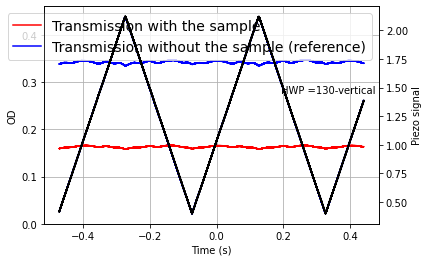

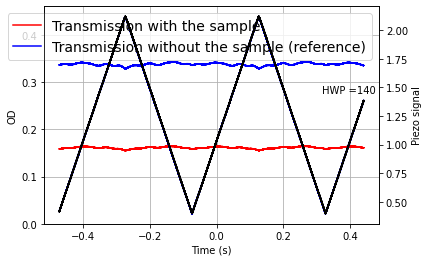

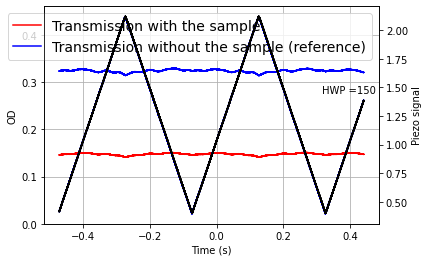

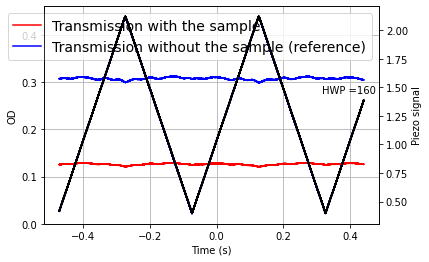

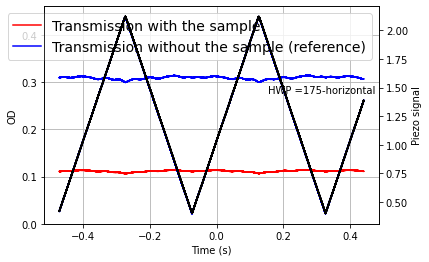

In [30]:
for index in range(num_of_files):
    path_data=dir + '\\' + folder + '\\' + files_data[index] # raw data when the laser is focused into the sample
    path_ref =dir + '\\' + folder + '\\' + files_ref[index] # raw data when the laser is moved away from the sample (references)
    data=pd.read_csv(path_data)
    data=data.to_numpy() # Read the raw data when the laser is focused into the sample
    ref =pd.read_csv(path_ref)
    ref =ref.to_numpy() # Read the raw data when the laser is moved away from the sample

    Time00=data[:,0]
    Piezo_trigger00=data[:,1]
    transmited_signal_perpendicular=data[:,2]
    Time01=ref[:,0]
    Piezo_trigger01=ref[:,1]
    transmited_signal_parallel=ref[:,2]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(Time00, transmited_signal_perpendicular, 'r-', label='Transmission with the sample')
    ax1.plot(Time01, transmited_signal_parallel, 'b-', label='Transmission without the sample (reference)')
    ax1.legend(loc='upper right',fontsize=14)
    ax2.plot(Time00, Piezo_trigger00, 'b-')
    ax2.plot(Time01, Piezo_trigger01, 'k-')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('OD')
    ax2.set_ylabel('Piezo signal')
    ax1.set_ylim([0,0.46])
    fig.patch.set_facecolor('white')
    ax1.grid(True)
    ax1.annotate('HWP ='+"{}".format(HWF_angle[index]),
            xy=(1.05, 0.5), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
    plt.show()

131040
131040


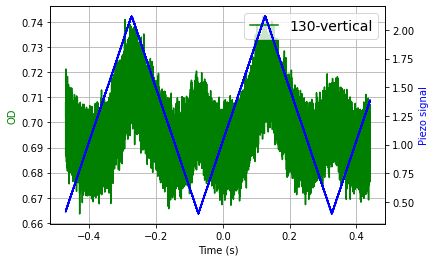

131040
131040


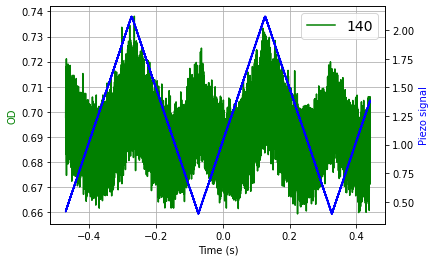

131040
131040


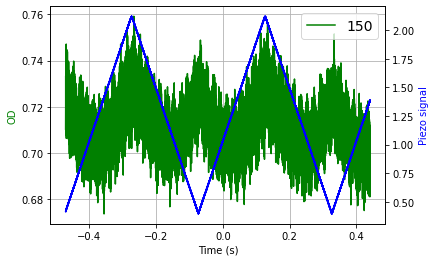

131040
131040


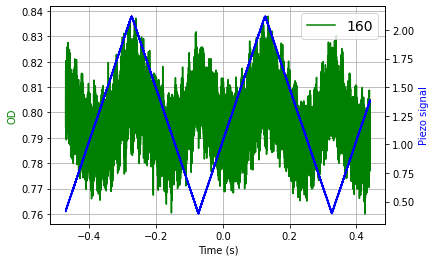

131040
131040


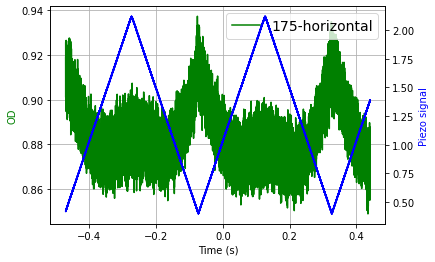

In [31]:
# In this cell, we used the measured references (the beam is moved to the emplty hole) as the ref values 
# for calculating the OD
# Channel 1 of scope: Time; Channel 2: Piezo signal; Channel 3: transmission signal from balance detector;
# Channel 4: reflected signal from the photodetector
for index in range(num_of_files):
    path_data=dir + '\\' + folder + '\\' + files_data[index] # raw data when the laser is focused into the sample
    path_ref =dir + '\\' + folder + '\\' + files_ref[index] # raw data when the laser is moved away from the sample (references)
    data=pd.read_csv(path_data)
    data=data.to_numpy()
    ref =pd.read_csv(path_ref)
    ref =ref.to_numpy()
    print(len(data[:,0]))
    print(len(ref[:,0]))
    #Need to judge the length of all the data
    if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3] # The transmission siganl is normalised by the reflected reference signal
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3] # The transmission siganl is normalised by the reflected reference signal (references)
        OD=np.log(normalised_ref/normalised_data)
        print(length_data)

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD, 'g-', label="{}".format(HWF_angle[index]))
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='g')
        ax2.set_ylabel('Piezo signal', color='b')
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()
        test=1
    else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3] # The transmission siganl is normalised by the reflected reference signal
        normalised_ref=ref[:,2]/ref[:,3] # The transmission siganl is normalised by the reflected reference signal (references)
        OD=np.log(normalised_ref/normalised_data)

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD, 'g-', label="{}".format(HWF_angle[index]))
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='g')
        ax2.set_ylabel('Piezo signal', color='b')
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()

        test=0

In [34]:
#This cell is used to calculate the scanning frequency range in one time period
for index in range(num_of_files):
        path_data=dir + '\\' + folder + '\\' + files_data[index] # raw data when the laser is focused into the sample
        path_ref =dir + '\\' + folder + '\\' + files_ref[index] # raw data when the laser is moved away from the sample (references)
        data=pd.read_csv(path_data)
        data=data.to_numpy()
        ref =pd.read_csv(path_ref)
        ref =ref.to_numpy()
        print(len(data[:,0]))
        print(len(ref[:,0]))
    
        Piezo_min=min(data[0:len(data[:,1])-50000,1])
        Piezo_max=max(data[0:len(data[:,1])-50000,1])
        print(Piezo_min)
        print(Piezo_max)
        loc_piezo_min=np.where(data[0:len(data[:,1])-50000,1]==Piezo_min)
        loc_piezo_max=np.where(data[0:len(data[:,1])-50000,1]==Piezo_max)
        print(loc_piezo_min[0])
        print(loc_piezo_max[0])
        num_of_one_piezo_period=loc_piezo_max[0]-loc_piezo_min[0]

        scanning_central_freq=191.05882 # Unit:THz
        scanning_amplitude=40 # Unite:V
        Piezo_slope=0.26898 # Unit: GHz/V; When the laser scanning offset is changed 1 V, the frequency will shift 0.26898 GHz
        freq_low=scanning_central_freq*1e3-Piezo_slope*scanning_amplitude/2
        freq_high=scanning_central_freq*1e3+Piezo_slope*scanning_amplitude/2
        freq_scale=np.linspace(freq_low,freq_high,int(num_of_one_piezo_period))

        if len(data[:,0]) != len(ref[:,0]):

                length_data=min(len(data[:,0]),len(ref[:,0]))
                Time=data[0:length_data,0]
                Piezo_trigger_signal=data[0:length_data,1]
                normalised_data=data[0:length_data,2]/data[0:length_data,3]
                normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
                OD=np.log(normalised_ref/normalised_data)

                fig, ax1 = plt.subplots()
                ax2 = ax1.twinx()
                ax1.plot(freq_scale, OD1[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-', label='ln(Vertical/Horizontal)')
                ax1.legend(loc='lower right',fontsize=14)
                ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
                ax1.set_xlabel('Frequency (GHz)')
                ax1.set_ylabel('OD', color='r')
                ax2.set_ylabel('Piezo signal', color='b')
                #ax1.set_ylim([0,0.18])
                #ax1.set_xlim([freq_low,freq_high])
                xticks = np.linspace(freq_low, freq_high, 4)
                ax1.set_xticks(xticks)
                ax1.ticklabel_format(style='plain')
                ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

                fig.patch.set_facecolor('white')
                ax1.grid(True)
                plt.show()
        else:
                Piezo_trigger_signal=data[:,1]
                Time=data[:,0]
                normalised_data=data[:,2]/data[:,3]
                normalised_ref=ref[:,2]/ref[:,3]
                OD=np.log(normalised_ref/normalised_data)
                OD1=np.log(ref[:,2]/data[:,2])

                fig, ax1 = plt.subplots()
                ax2 = ax1.twinx()
                #ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
                ax1.plot(freq_scale, OD1[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-')
                ax1.legend(loc='upper right',fontsize=14)
                ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
                ax1.set_xlabel('Frequency (GHz)')
                ax1.set_ylabel('OD', color='r')
                ax2.set_ylabel('Piezo signal', color='b')
                #ax1.set_ylim([0,0.18])
                #ax1.set_xlim([data[loc_piezo_min[0],0],data[loc_piezo_max[0],0]])
                xticks = np.linspace(freq_low, freq_high, 4)
                ax1.set_xticks(xticks)
                ax1.ticklabel_format(style='plain')
                ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
                fig.patch.set_facecolor('white')
                ax1.grid(True)
                plt.show()


131040
131040
0.394601262622
2.1187346557
[57104]
[28280]


ValueError: Number of samples, -28824, must be non-negative.